# 多分类问题

借助对数几率回归可以回答‘是’和‘否’的问题。现在希望解决能回答多个答案的问题，比如说这张照片是猫还是狗还是鸟？
对于这样的多分类问题，我们可以使用softmax函数，softmax函数返回含有N个分量概率的向量，分量之和为1.

由于模型需要计算N个输出，所以需要N个不同的权值组，每个权值组对应一个可能的输出。

In [1]:
import requests
import numpy as np

In [2]:
r = requests.get('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [3]:
with open('iris.data','w') as f:
    f.write(r.text)

In [4]:
import pandas as pd
data = pd.read_csv('iris.data',names = ['e_cd','e_kd','b_cd','b_kd','cat'])

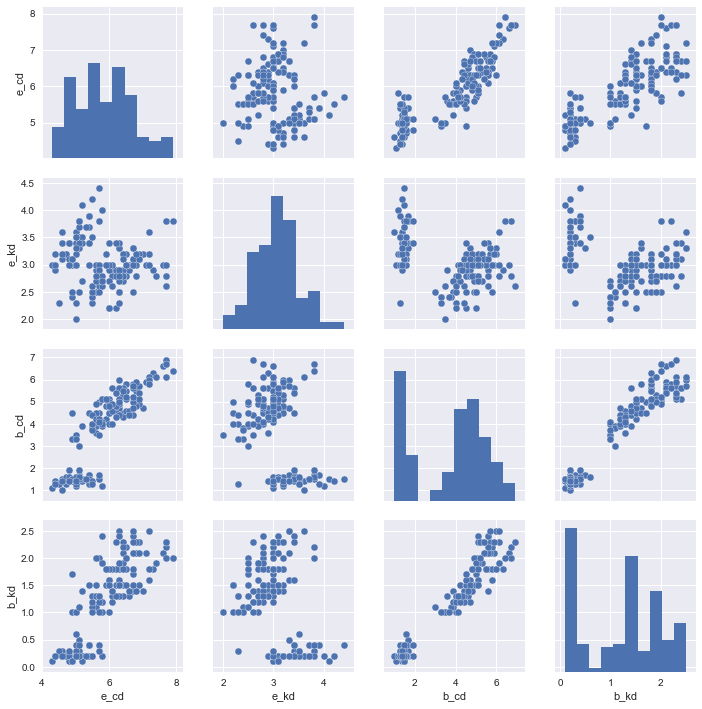

In [8]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data)

In [6]:
data.cat.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data['c1'] = np.array(data['cat'] == 'Iris-setosa').astype(np.float32)
data['c2'] = np.array(data['cat'] == 'Iris-versicolor').astype(np.float32)
data['c3'] = np.array(data['cat'] == 'Iris-virginica').astype(np.float32)

In [9]:
target =  np.stack([data.c1.values,data.c2.values,data.c3.values]).T

In [8]:
shuju = np.stack([data.e_cd.values,data.e_kd.values,data.b_cd.values,data.b_kd.values]).T

In [9]:
np.shape(shuju),np.shape(target)

((150, 4), (150, 3))

# 定义网络

In [10]:
import tensorflow as tf

In [11]:
x = tf.placeholder("float", shape=[None,4])
y = tf.placeholder("float", shape=[None,3])

In [12]:
weight = tf.Variable(tf.truncated_normal([4,3]))
bias = tf.Variable(tf.truncated_normal([3]))
combine_input = tf.matmul(x,weight) + bias

In [13]:
pred = tf.nn.softmax(combine_input)

In [14]:
y.get_shape(),combine_input.get_shape()

(TensorShape([Dimension(None), Dimension(3)]),
 TensorShape([Dimension(None), Dimension(3)]))

In [15]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=combine_input))

In [16]:
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [42]:
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)

In [43]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [44]:
for i in range(10000):
    index = np.random.permutation(len(target))
    shuju = shuju[index]
    target = target[index]
    sess.run(train_step,feed_dict={x: shuju, y: target})
    if i%1000 == 0:
        print(sess.run((loss,accuracy),feed_dict={x:shuju, y:target}))

(4.4623532, 0.33333334)
(1.0263245, 0.41999999)
(0.73765606, 0.48666668)
(0.5733363, 0.62)
(0.46450663, 0.84666669)
(0.37607214, 0.94666666)
(0.30085087, 0.97333336)
(0.23952286, 0.98000002)
(0.19176623, 0.98666668)
(0.15556259, 0.98666668)
